<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-management-and-data-infrastructure-college-task/blob/main/Bank_Marketing_Campaign_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Library**


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

##**Load Dataset**

Mount Google Drive


In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


Navigasi File


In [36]:
file_path ='/content/drive/My Drive/Management and Infrastruktur Data/bank.csv'
data = pd.read_csv(file_path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## **1. Pra-Pengolahan Data**


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Menangani nilai yang hilang (*missing value*)

In [38]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## **2. Eksplorasi Data (EDA)**

Statistik deskriptif


In [39]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [40]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in categorical_cols:
  print(f"Value counts for columns {col}:")
  print(data[col].value_counts())
  print("\n")

Value counts for columns job:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


Value counts for columns marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


Value counts for columns education:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64


Value counts for columns default:
default
no     10994
yes      168
Name: count, dtype: int64


Value counts for columns housing:
housing
no     5881
yes    5281
Name: count, dtype: int64


Value counts for columns loan:
loan
no     9702
yes    1460
Name: count, dtype: int64


Value counts for columns contact:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


Value

Distribusi variabel numerik


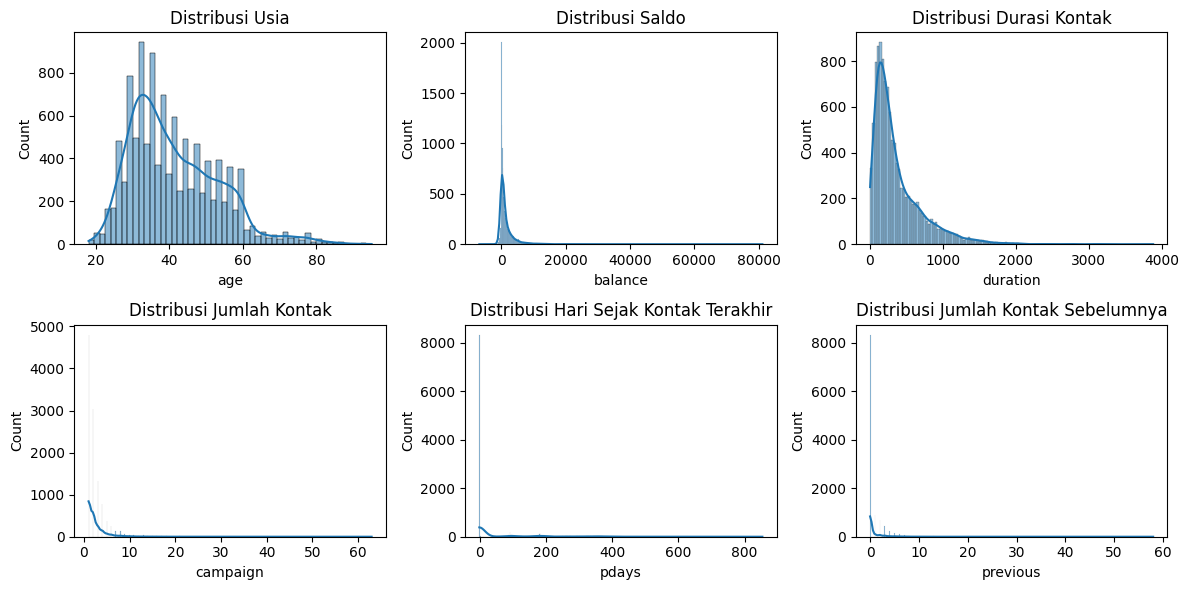

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data['age'], kde=True)
plt.title('Distribusi Usia')
plt.subplot(2, 3, 2)
sns.histplot(data['balance'], kde=True)
plt.title('Distribusi Saldo')
plt.subplot(2, 3, 3)
sns.histplot(data['duration'], kde=True)
plt.title('Distribusi Durasi Kontak')
plt.subplot(2, 3, 4)
sns.histplot(data['campaign'], kde=True)
plt.title('Distribusi Jumlah Kontak')
plt.subplot(2, 3, 5)
sns.histplot(data['pdays'], kde=True)
plt.title('Distribusi Hari Sejak Kontak Terakhir')
plt.subplot(2, 3, 6)
sns.histplot(data['previous'], kde=True)
plt.title('Distribusi Jumlah Kontak Sebelumnya')
plt.tight_layout()
plt.show()


Boxplot untuk melihat outlier


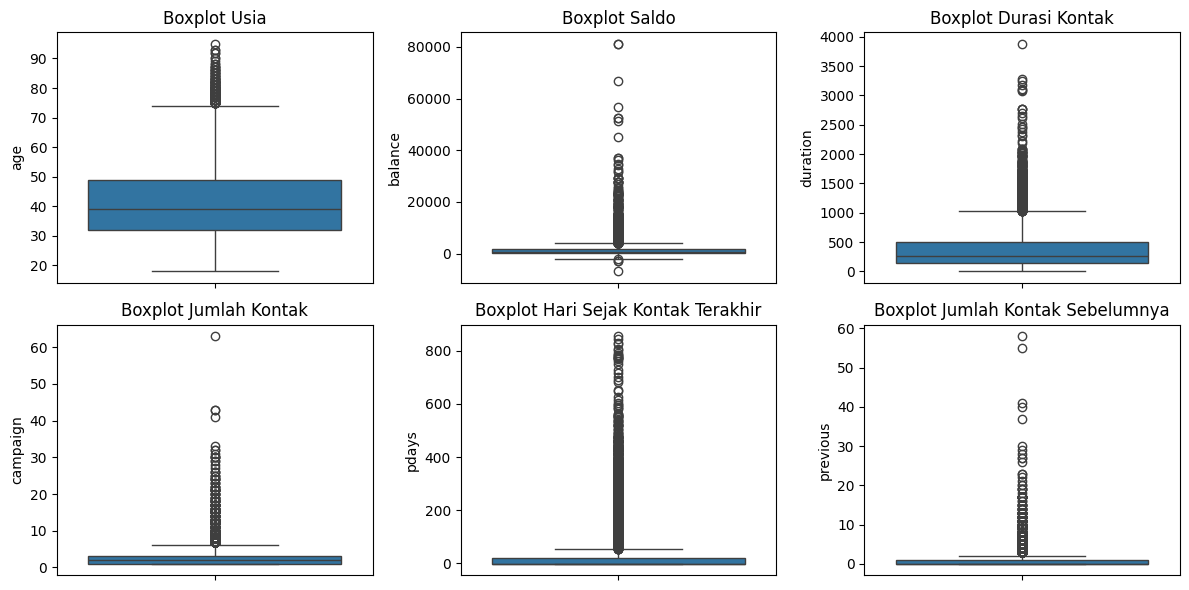

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(y=data['age'])
plt.title('Boxplot Usia')
plt.subplot(2, 3, 2)
sns.boxplot(y=data['balance'])
plt.title('Boxplot Saldo')
plt.subplot(2, 3, 3)
sns.boxplot(y=data['duration'])
plt.title('Boxplot Durasi Kontak')
plt.subplot(2, 3, 4)
sns.boxplot(y=data['campaign'])
plt.title('Boxplot Jumlah Kontak')
plt.subplot(2, 3, 5)
sns.boxplot(y=data['pdays'])
plt.title('Boxplot Hari Sejak Kontak Terakhir')
plt.subplot(2, 3, 6)
sns.boxplot(y=data['previous'])
plt.title('Boxplot Jumlah Kontak Sebelumnya')
plt.tight_layout()
plt.show()

Proporsi kelas target ('deposit')


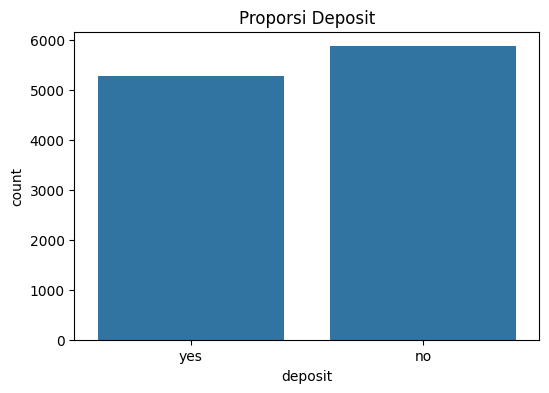

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['deposit'])
plt.title('Proporsi Deposit')
plt.show()

Hubungan antara variabel kategorikal dan target

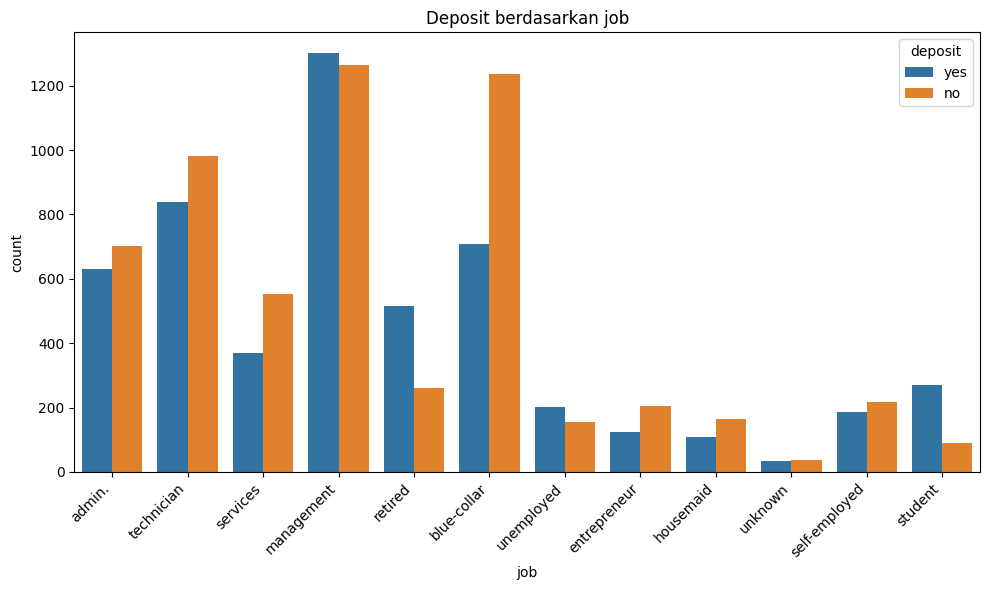

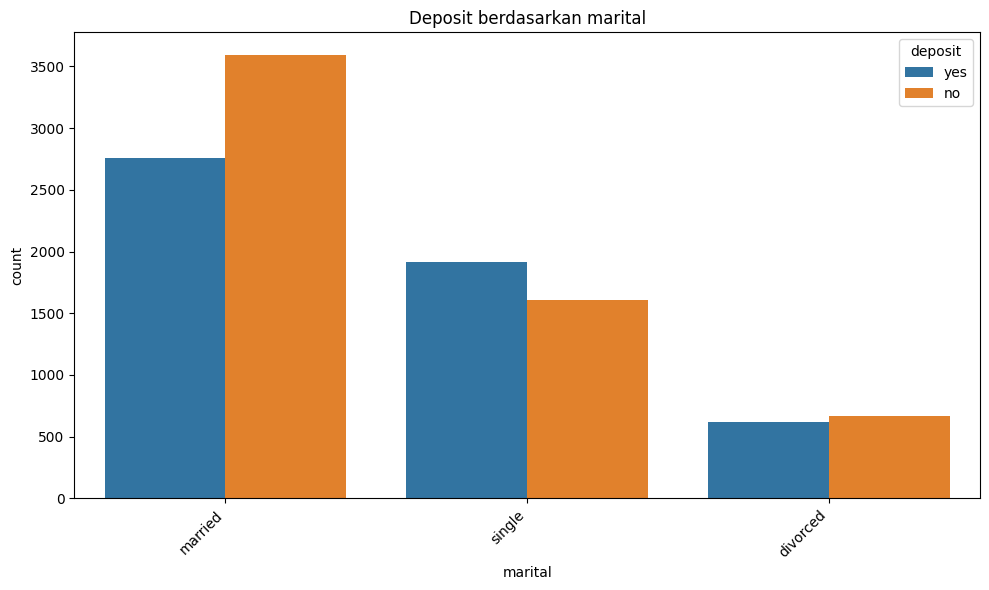

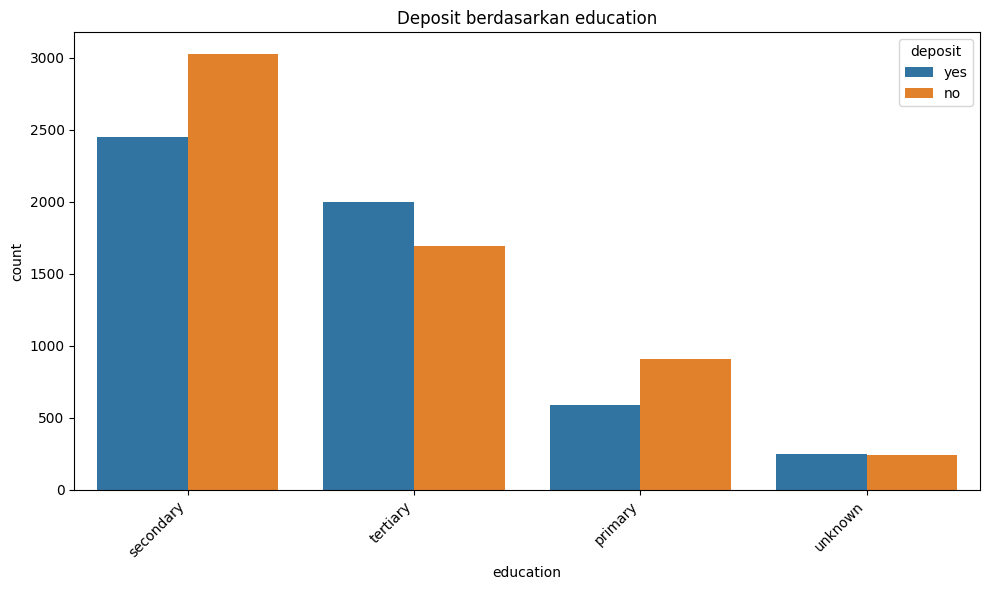

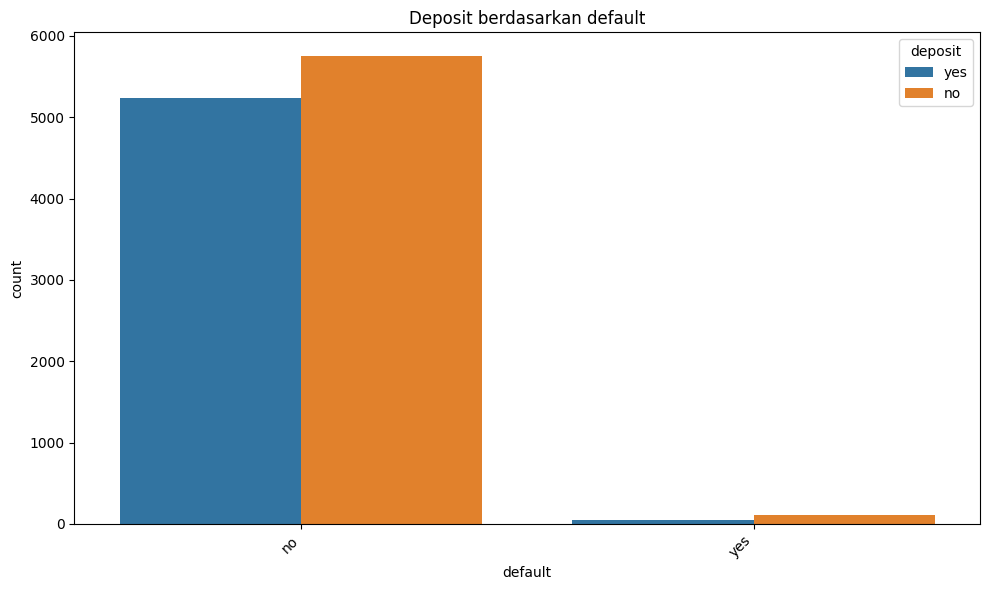

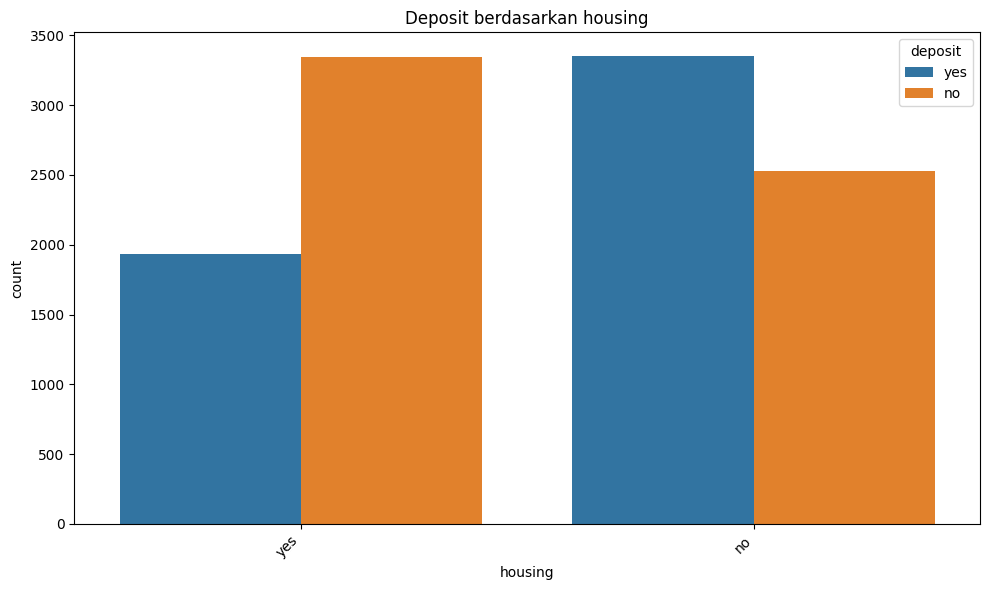

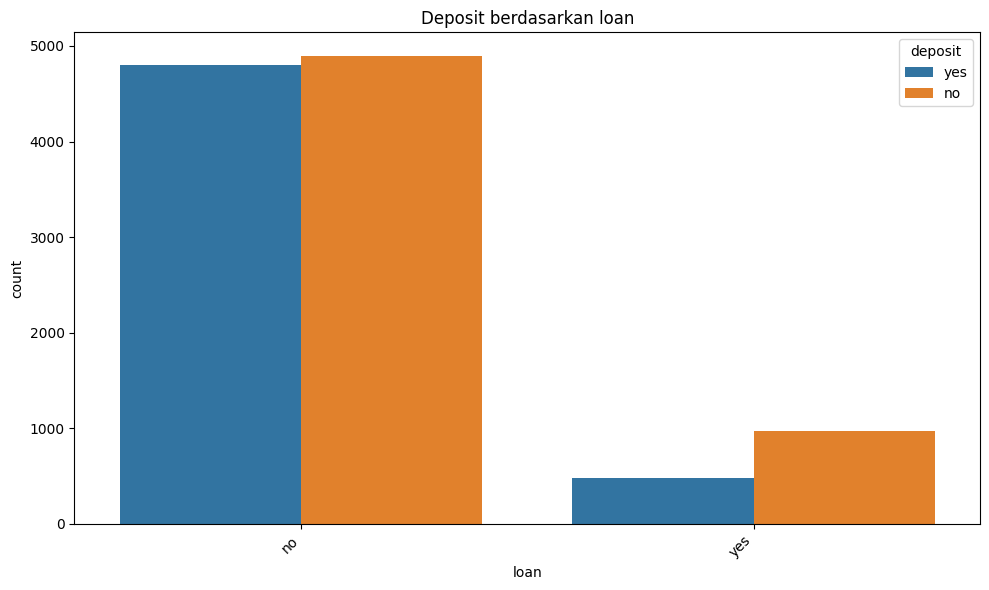

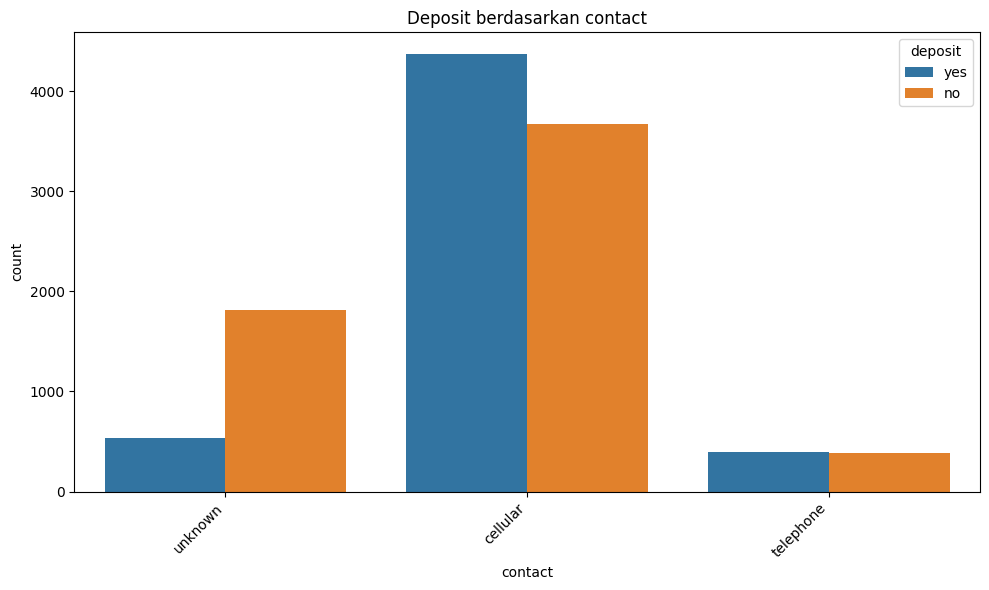

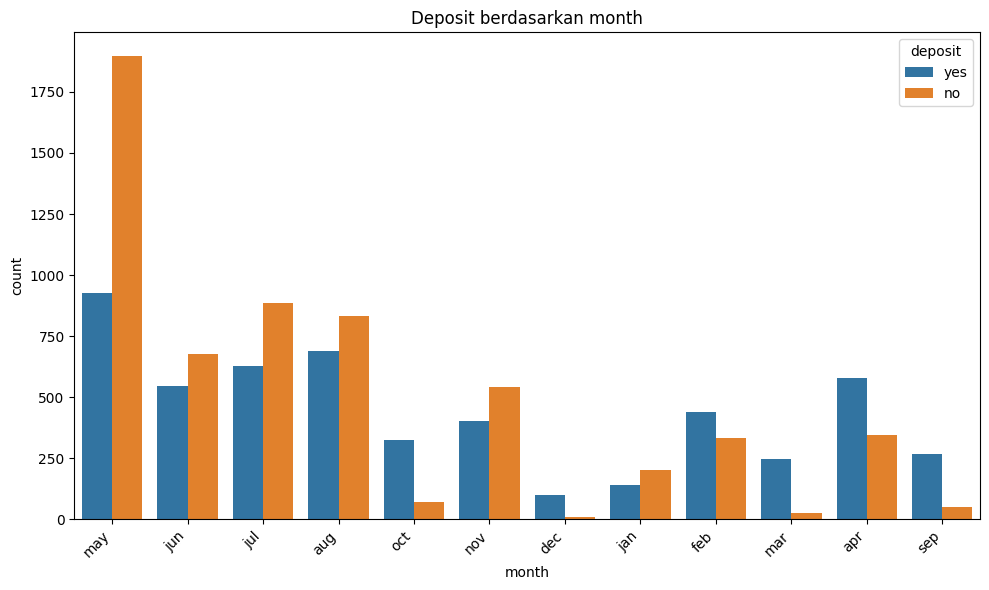

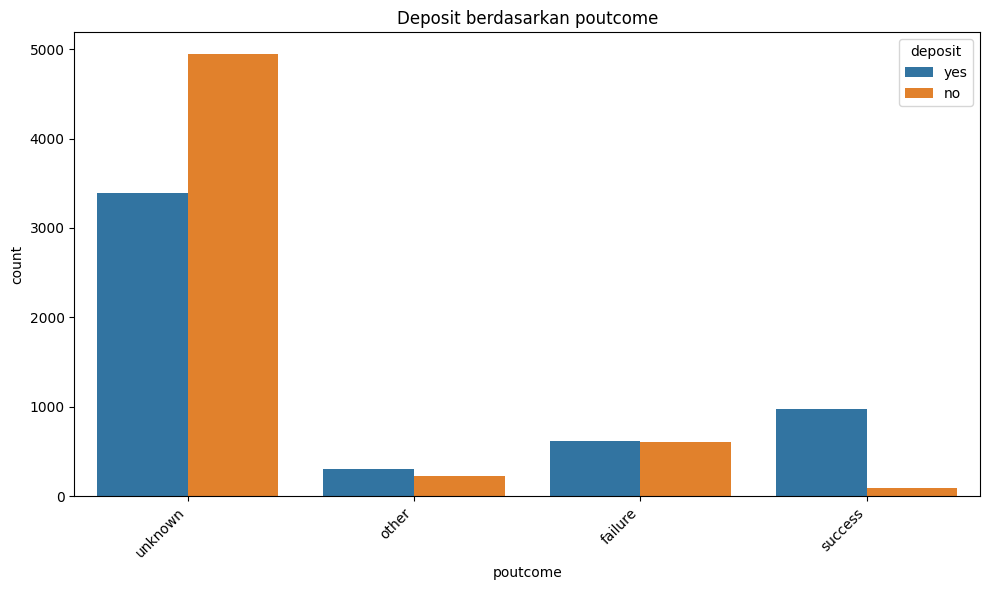

In [44]:
categorical_cols_eda = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] # Kolom kategorikal sebelum di-encode
for col in categorical_cols_eda:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col], hue=data['deposit'])
    plt.title(f'Deposit berdasarkan {col}')
    plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

## **3. Feature Engineering**

**a. Membuat fitur interaksi**


In [45]:
# Contoh: Kombinasi 'age' dan 'job'
data['age_job'] = data['age'].astype(str) + '_' + data['job']
encoder_age_job = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_age_job = encoder_age_job.fit_transform(data[['age_job']])
encoded_age_job_df = pd.DataFrame(encoded_age_job, columns=encoder_age_job.get_feature_names_out(['age_job']))
data = data.drop(columns=['age_job'])  # Hapus kolom asli
data = pd.concat([data, encoded_age_job_df], axis=1)

**b. Encoding Fitur Kategorikal**

Konversi variabel kategorikal menjadi numerik menggunakan One-Hot Encoding


In [46]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse=false agar output tidak sparse matrix, handle_unknown='ignore' agar data baru
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
data = data.drop(categorical_cols, axis=1) # Hapus kolom kategorikal asli
data = pd.concat([data, encoded_df], axis=1) # Gabungkan data dengan hasil encoding


Mengubah variabel target 'deposit' menjadi numerik (0 dan 1)


In [47]:
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})


Standarisasi data numerik (opsional, tapi direkomendasikan untuk beberapa model)


In [48]:
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

c. Binning untuk variabel numerik


In [49]:
# Contoh: Binning 'age' menjadi 3 kategori
bins = [0, 30, 60, 100]
labels = ['Muda', 'Dewasa', 'Lansia']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['age_group'], prefix=['age_group']) # One-hot encoding untuk 'age_group'


**d. Membuat fitur baru**


In [50]:
# Contoh: Total jumlah interaksi (campaign + previous)
data['total_interactions'] = data['campaign'] + data['previous']